# Initialization

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from result_saver import SaverProvider

provider = SaverProvider()

In [3]:
from Scratch import load_calibration_memory

DEVICE = 'ibm_sherbrooke'
OTHER_DATE = '2023-10-30'

all_memories = load_calibration_memory(provider, tobecalib_backend=DEVICE, other_date=OTHER_DATE)

Found jobs for backend ibm_sherbrooke with closest execution date 2023-10-27 08:32:22.841567+00:00.


# Scale and fit

In [4]:
from soft_info import get_KDEs

kde_dict, scaler_dict = get_KDEs(provider, tobecalib_backend=DEVICE, other_date=OTHER_DATE)

Found jobs for backend ibm_sherbrooke with closest execution date 2023-10-27 08:32:22.841567+00:00.


In [33]:
import numpy as np
from sklearn.preprocessing import StandardScaler

qubit = 126

IQ_data = np.append(all_memories[qubit]["mmr_0"], all_memories[qubit]["mmr_1"]) # append both 0 and 1 states!
data = IQ_data.flatten()
data = data.real # only take real part

# # rescale
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data.reshape(-1, 1)).flatten()


# Fit two gaussians to the model

In [1]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, covariance_type='tied', random_state=0)

gmm.fit(data.reshape(-1, 1))
print(gmm.means_)
print(gmm.covariances_)

NameError: name 'data' is not defined

# Plot the gaussian

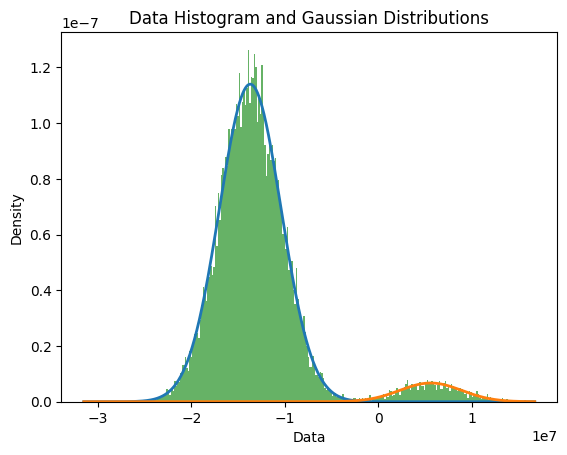

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# Assuming 'all_memories' and 'qubit' are defined and contain your data
IQ_data = np.append(all_memories[qubit]["mmr_0"], all_memories[qubit]["mmr_1"])
data = IQ_data.flatten().real

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, covariance_type='tied', random_state=0)
gmm.fit(data.reshape(-1, 1))

# Extract means and covariances
means = gmm.means_.flatten()
covariances = np.append(gmm.covariances_, gmm.covariances_).flatten()

# Create a range of values for plotting the Gaussian distributions
x = np.linspace(data.min(), data.max(), 1000)

# Calculate the Gaussian distributions
gaussians = [
    weight*(1 / (np.sqrt(2 * np.pi * covariance))) * 
    np.exp(-0.5 * ((x - mean) ** 2) / covariance)
    for mean, covariance, weight in zip(means, covariances, gmm.weights_)
]

# Plotting
plt.hist(data, bins=300, density=True, alpha=0.6, color='g')
for gaussian in gaussians:
    plt.plot(x, gaussian, linewidth=2)
plt.title("Data Histogram and Gaussian Distributions")
plt.xlabel("Data")
plt.ylabel("Density")
plt.show()
